In [2]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import seaborn as sns


In [83]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.metrics import jaccard_score

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [13]:
from sklearn.metrics import classification_report


In [15]:
from sklearn.model_selection import cross_val_predict


In [16]:
from sklearn.metrics import classification_report


In [66]:
from sklearn.model_selection import GridSearchCV


In [19]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)

In [20]:
df.shape

(569, 32)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)


In [41]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [45]:
df.drop(columns=['fractal_dimension_se','smoothness_se','fractal_dimension_mean','symmetry_se','texture_se'], inplace=True)


In [62]:
df.drop(columns=['area_mean'], inplace=True)

In [64]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concave points_mean,symmetry_mean,radius_se,concave points_se,texture_worst,perimeter_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.358560,0.776614,0.330499,0.567134,0.408042,0.456903,0.782914,0.421465,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.170581,0.822529,0.147741,0.679090,0.376169,0.297008,0.965137,0.119616,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.023389,0.293464,0.071401,0.275869,0.163851,0.912045,0.358040,0.077503,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.207278,0.850977,0.183027,0.691765,0.407217,0.303038,0.970387,0.150549,0.771241,0.189115,0.051019
smoothness_mean,0.358560,0.170581,0.023389,0.207278,1.000000,0.553695,0.557775,0.301467,0.380676,0.036072,0.238853,0.805324,0.503053,0.394309,0.499316
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.553695,1.000000,0.462497,0.698050,0.615634,0.292752,0.855923,0.452753,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.557775,0.462497,1.000000,0.303379,0.393298,0.090651,0.219169,0.426675,0.430297,0.699826,0.438413
radius_se,0.567134,0.679090,0.275869,0.691765,0.301467,0.698050,0.303379,1.000000,0.513346,0.194799,0.719684,0.141919,0.531062,0.094543,0.049559
concave points_se,0.408042,0.376169,0.163851,0.407217,0.380676,0.615634,0.393298,0.513346,1.000000,0.086741,0.394999,0.215351,0.602450,0.143116,0.310655
texture_worst,0.456903,0.297008,0.912045,0.303038,0.036072,0.292752,0.090651,0.194799,0.086741,1.000000,0.365098,0.225429,0.359755,0.233027,0.219122


In [69]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)


In [99]:
knn = KNeighborsClassifier(n_neighbors=3) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [100]:
y_predict = knn.predict(X_test)


In [101]:
jaccard_score(y_test, y_predict)


0.8958333333333334

<AxesSubplot:>

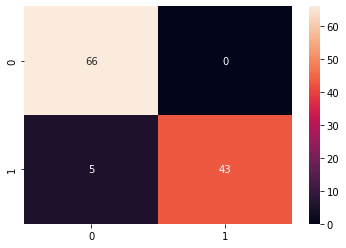

In [102]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)


In [103]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=1.0
recall=0.8958333333333334
f1=0.945054945054945
accuracy=0.956140350877193


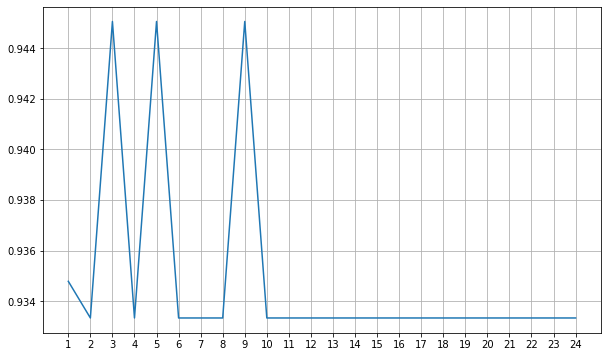

In [104]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [92]:

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [94]:
knn_gscv.best_params_

{'n_neighbors': 6}

In [105]:
knn_gscv.best_score_

0.9630647414997672

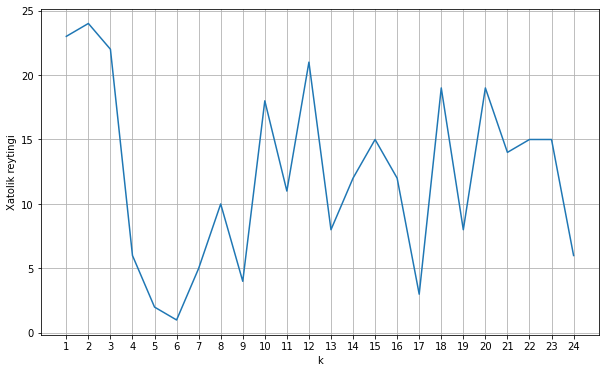

In [106]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()